In [1]:
import torch
import torchvision

In [2]:
"""A modified image folder class

We modify the official PyTorch image folder (https://github.com/pytorch/vision/blob/master/torchvision/datasets/folder.py)
so that this class can load images from both current directory and its subdirectories.
"""

import torch.utils.data as data

from PIL import Image
import os
import os.path

IMG_EXTENSIONS = [
    '.jpg', '.JPG', '.jpeg', '.JPEG',
    '.png', '.PNG', '.ppm', '.PPM', '.bmp', '.BMP',
]


def is_image_file(filename):
    return any(filename.endswith(extension) for extension in IMG_EXTENSIONS)


def make_dataset(dir, max_dataset_size=float("inf")):
    images = []
    assert os.path.isdir(dir), '%s is not a valid directory' % dir

    for root, _, fnames in sorted(os.walk(dir)):
        for fname in fnames:
            if is_image_file(fname):
                path = os.path.join(root, fname)
                images.append(path)
    return images[:min(max_dataset_size, len(images))]


def default_loader(path):
    return Image.open(path).convert('RGB')


class ImageFolder(data.Dataset):

    def __init__(self, root, transform=None, return_paths=False,
                 loader=default_loader):
        imgs = make_dataset(root)
        if len(imgs) == 0:
            raise(RuntimeError("Found 0 images in: " + root + "\n"
                               "Supported image extensions are: " +
                               ",".join(IMG_EXTENSIONS)))

        self.root = root
        self.imgs = imgs
        self.transform = transform
        self.return_paths = return_paths
        self.loader = loader

    def __getitem__(self, index):
        path = self.imgs[index]
        img = self.loader(path)
        if self.transform is not None:
            img = self.transform(img)
        if self.return_paths:
            return img, path
        else:
            return img

    def __len__(self):
        return len(self.imgs)


In [71]:
folder = ImageFolder('/opt/shared/wikiart/wikiart-saved/images/wu-guanzhong')

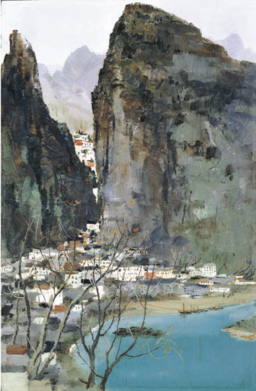

In [6]:
torchvision.transforms.Resize(256)(folder[0])

In [28]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

In [38]:
def three_crop(img, size):
    w, h = img.size
    if size > w or size > h:
        raise ValueError("Requested crop size {} is bigger than input size {}".format(size,
                                                                                      (h, w)))
    center = F.center_crop(img, size)
    if w > h:
        return((img.crop((0, 0, size, size)), img.crop((w - size, 0, w, size)), center))
    else:
        return((img.crop((0, 0, size, size)), img.crop((0, h - size, size, h)), center))

In [107]:
def showall(imgs):
    n = len(imgs)
    f, axs = plt.subplots(1,n,figsize=(15,15))
    for i, img in enumerate(imgs):
        axs[i].imshow(img)

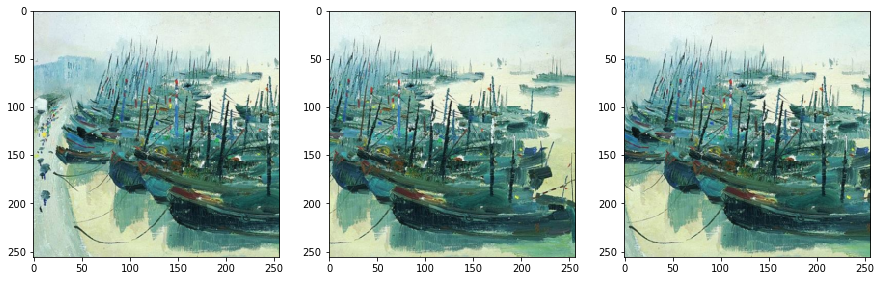

In [111]:
showall(three_crop(torchvision.transforms.Resize(256)(folder[4]), 256))

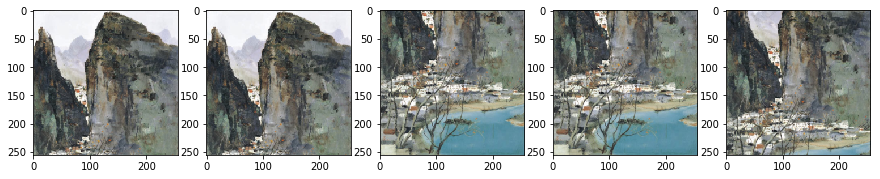

In [110]:
showall(torchvision.transforms.FiveCrop(256)(torchvision.transforms.Resize(256)(folder[0])))

In [87]:
for i, origin in enumerate(folder):
    imgs = three_crop(torchvision.transforms.Resize(256)(origin), 256)
    for j, im in enumerate(imgs):
        im.save(os.path.join('/opt/shared/resized/wu-guanzhong/', 'wuguanzhong-{}-{}.jpg'.format(i, j)), 'JPEG')